## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
# 导入线性回归模型
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import operator
# 用icecream进行调试可以打印出变量名
from icecream import ic  
# 解决 matplotlib 中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
# 计算x的函数
def f(x):
    return 15.5 * x + np.random.randint(-50, 50)

In [3]:
def linear_Reg(x, plot = True):
    # 设定随机种子
    np.random.seed(42)
    # 产生数据X,Y
    X = (np.random.random(100)*10).reshape(-1, 1)
    Y = np.array([f(i) for i in X])
    # 实例化算法模型，并拟合数据
    model = linear_model.LinearRegression().fit(X,Y)
    # 基于训练好的模型对象实现预测功能
    y_pred = model.predict(x)
    # 是否展示可视化
    if plot:        
        # 根据回归系数和截距计算X对应的y值
        y = model.coef_ * X + model.intercept_
        # 设置画布大小
        plt.figure(figsize=(10,6))
        # 绘制原始数据X,Y散点图
        plt.scatter(X, Y ,color='g',alpha=0.4)
        # 绘制原始数据X,y的线性图
        plt.plot(X, y, color='b',alpha=0.7)
        # 绘制预测数据x,与对应的y_pred的散点图
        plt.scatter(x,y_pred, color='r',marker='^',s = 80,alpha=0.8)
        plt.xlabel('X轴',fontsize=12)
        plt.ylabel('Y轴',fontsize=12)
        # 把x，和y_pred 作为注释添加到图中
        for i,j in zip(x,y_pred):
            plt.text(i[0]-0.6,j[0]+14,'（%.2f，%.2f）'%(i[0],j[0]), color = 'black', alpha=0.9,bbox=dict(boxstyle='round,pad=0.5', fc='r', ec='k', lw=1, alpha=0.1))
    print('y_pred:',y_pred.reshape(1,-1))
    print('线性模型的回归系数:',model.coef_[0][0])
    print('线性模型的截距:',model.intercept_[0])
    return y_pred, model.coef_, model.intercept_

y_pred: [[121.49180661 144.30902429  59.40413943]]
线性模型的回归系数: 15.521916793556553
线性模型的截距: 1.1969514571311208


(array([[121.49180661],
        [144.30902429],
        [ 59.40413943]]), array([[15.52191679]]), array([1.19695146]))

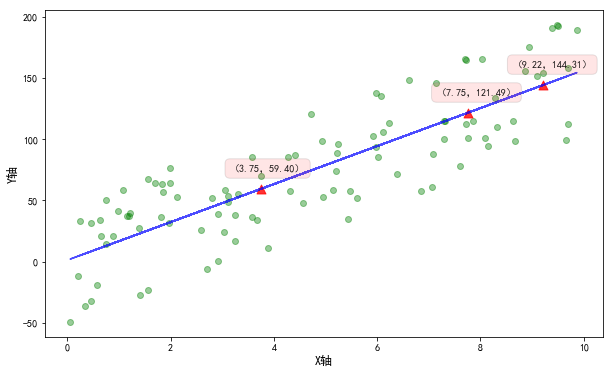

In [4]:
linear_Reg([[7.75],[9.22],[3.75]])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [5]:
from scipy.spatial.distance import cosine

In [6]:
np.random.seed(2020)
# 产生数据X,Y
X = (np.random.random(100)*10).reshape(-1, 1)
Y = np.array([f(i) for i in X])

In [7]:
def distance(x1,x2):
    return cosine(x1,x2)

In [8]:
def knn_model(X,Y):
    return [(Xi,yi) for Xi,yi in zip(X,Y)]

In [9]:
def predict(x, k = 5):
    most_similars = sorted(knn_model(X,Y),key = lambda xi:distance(xi[0],x))[:k]
    y_hats = [_y for x,_y in most_similars]
    print(most_similars)
    return np.mean(y_hats)

In [10]:
X, Y

(array([[9.86276829],
        [8.73391946],
        [5.09745525],
        [2.71835714],
        [3.36918728],
        [2.16954265],
        [2.76477143],
        [3.43315593],
        [8.62158935],
        [1.5669967 ],
        [1.40887245],
        [7.57080281],
        [7.36324918],
        [3.55663092],
        [3.41093017],
        [6.66803051],
        [2.17100639],
        [5.61426982],
        [1.24178778],
        [3.19736484],
        [9.53213873],
        [1.37356791],
        [5.69413097],
        [9.75665483],
        [5.03367061],
        [6.67664206],
        [0.34191498],
        [4.56119366],
        [1.55851363],
        [4.76048966],
        [1.69702438],
        [8.96258337],
        [3.73393758],
        [3.7969293 ],
        [8.58316588],
        [6.46061055],
        [5.83461698],
        [6.68350027],
        [1.7779262 ],
        [8.49248017],
        [4.42372582],
        [8.3146771 ],
        [7.63920716],
        [9.19690977],
        [0.70573427],
        [1

In [11]:
my_knn = knn_model(X, Y)

In [12]:
predict(0.9)

[(array([5.03367061]), array([41.02189445])), (array([1.7779262]), array([-9.44214387])), (array([4.61384276]), array([63.51456276])), (array([1.17374868]), array([-18.80689553])), (array([9.86276829]), array([197.87290847]))]


54.832065257690374

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [13]:
from collections import Counter

In [14]:
# 用icecream进行调试可以打印出变量名
from icecream import ic  

# 定义信息熵
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)


entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [15]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    ic(x_fields)
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [16]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [17]:
dataset = pd.DataFrame(mock_data)

In [18]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [19]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| x_fields: {'gender', 'income', 'family_number'}
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [20]:
dataset[dataset['family_number']==2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [21]:
dataset[dataset['family_number']!=2]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [22]:
find_the_optimal_spilter(dataset[dataset['family_number'] != 2], 'bought')

ic| x_fields: {'gender', 'income', 'family_number'}
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_spliter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 1, 0, 0, 0]


spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


('income', '+10')

In [23]:
dataset[dataset['family_number'] != 2]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [24]:
fm_n_1 = dataset[dataset['family_number'] != 2]

In [25]:
fm_n_1[fm_n_1['income']=='+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [26]:
fm_n_1[fm_n_1['income'] != '+10']

,gender,income,family_number,bought
1,F,-10,1,1


In [27]:
find_the_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

ic| x_fields: {'gender', 'income', 'family_number'}
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6931471805599453
ic| f: 'income'
ic| values: {'+10'}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_2: 0
ic| entropy_v: 0.5623351446188083


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

In [28]:
fm_n_1[(fm_n_1['income'] == '+10') & (fm_n_1['family_number'] == 1)]

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [29]:
fm_n_1.loc[fm_n_1['income'] =='+10',['gender','bought']]

,gender,bought
0,F,1
3,F,0
4,M,0
5,M,0


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [30]:
from sklearn.cluster import KMeans

In [31]:
# 设置随机种子，产生数据
np.random.seed(42)
X = np.random.randint(1,100,200).reshape(100,2)
X1 = X[:,0]
X2 = X[:,1]

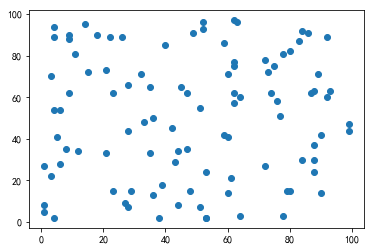

In [32]:
plt.scatter(X1, X2)

In [33]:
training_data = X

In [34]:
cluster = KMeans(n_clusters=6, max_iter=500)
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
# 聚类中心
cluster.cluster_centers_

array([[15.68421053, 77.57894737],
       [44.46666667, 47.        ],
       [72.92592593, 77.40740741],
       [ 7.72727273, 22.72727273],
       [45.6       , 10.66666667],
       [85.53846154, 29.15384615]])

In [36]:
# 聚类labels
cluster.labels_

array([2, 0, 4, 2, 2, 5, 3, 4, 5, 4, 2, 3, 2, 0, 2, 1, 2, 5, 2, 1, 1, 4,
       4, 0, 4, 0, 4, 0, 4, 2, 2, 4, 1, 2, 1, 3, 0, 0, 2, 0, 1, 2, 0, 4,
       2, 2, 0, 2, 4, 0, 1, 4, 1, 2, 0, 3, 2, 0, 3, 1, 3, 4, 2, 3, 1, 0,
       5, 5, 2, 1, 5, 5, 3, 5, 4, 5, 5, 5, 2, 2, 0, 3, 1, 4, 0, 2, 0, 1,
       1, 3, 1, 5, 2, 2, 2, 3, 2, 0, 5, 0])

In [37]:
from collections import defaultdict
centers = defaultdict(list)

for label, location in zip(cluster.labels_, training_data):
    centers[label].append(location)  

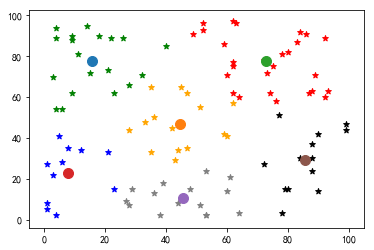

In [38]:
color = ['red', 'green', 'grey', 'black', 'blue', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i],marker='*')
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:


#### 模型是什么？

所谓统计模型，顾名思义就是用以刻画、反映现象发展变化趋势、或测度不同现象之间内在联系关系、或据以推断总体特征的数学方程，所以模型构建的过程，就是把上述趋势、关系和特征进行量化的过程，因而统计模型的关键词就是变量、参数和方程形式。

#### 为什么所有的模型都是错的，但有些是有用的？

##### 前半句理解：

1、首先，统计模型毕竟只是用一定的方程给出一个模拟的型态，由于不知道所研究问题的实际情况，所以模拟的过程没有真实的参照物，只能根据已经掌握了的有关信息去勾勒其可能的状态，因而它不是真实的，与实际情况不可能完全一致。

2、统计模型的构建有很多假设条件或限制条件，这些假设通常由一组概率分布来描述，其中一些概率分布被假定为充分近似于对特定总体进行抽样的分布，因此，统计模型只是以相当理想化的形式来表示所研究问题的数据生成过程，是统计推断理论的形式化表示，而这些假设条件或者分布往往是不严格成立的，有时甚至差距很大。

3、统计模型由与一个或多个变量相关的数学方程来确定，确定的依据是已掌握的样本数据或历史数据，是样本数据（历史数据）与方程形式固化的理想结果，因此在据以进行放大推断或外推预测时，实际情况不可能与模型保持一致。

4、在统计模型中，我们通常都把涉及到的变量当成随机变量来处理，而事实上很多变量、特别是社会经济统计变量并不是完全的随机变量而是半随机变量，因此，基于随机变量假设的统计模型不能很好地刻画半随机变量的统计数据特征。

##### 后半句理解：

统计研究作为量化认识事物本质特征的方式，就是要用统计数据去描述事物特征，以统计规律去逼近事物的本质规律，而统计模型则是发现和描述统计规律的有效工具之一。当基于统计模型的统计规律能够比较好地解释客观事物的问题、本质和发展趋势时，它就是有用的。也就是说，统计模型是否有用，取决于它对现实问题的定量解释能力。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

#### 什么是欠拟合和过拟合？

过拟合(overfitting)：“过拟合”常常在模型学习能力过强的情况中出现，此时的模型学习能力太强，以至于将训练集单个样本自身的特点都能捕捉到，并将其认为是“一般规律”，同样这种情况也会导致模型泛化能力下降。

欠拟合(underfitting)：“欠拟合”常常在模型学习能力较弱，而数据复杂度较高的情况出现，此时模型由于学习能力不足，无法学习到数据集中的“一般规律”，因而导致泛化能力弱。

两者的区别：欠拟合在训练集和测试集上的性能都较差，而过拟合往往能较好地学习训练集数据的性质，而在测试集上的性能较差。在神经网络训练的过程中，欠拟合主要表现为输出结果的高偏差，而过拟合主要表现为输出结果的高方差。

#### 列出可能导致模型过拟合或欠拟合的原因

欠拟合原因：1、模型复杂度过低；2、特征量过少

欠拟合解决方法：1、增加新特征；2、增加模型复杂度

过拟合原因：1、训练集和测试集特征分布不一致；2、数据噪声太大；3、数据量太小；4、特征量太多；5、模型太过复杂

过拟合解决方法：1、减少特征数量；2、正则化；3、增大样本训练规模；4、简化模型；5、交叉验证；6、使用dropout

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

#### 什么是precision, recall, AUC, F1, F2score？

精确率（Precision）：查准率。即正确预测为正的占全部预测为正的比例。个人理解：真正正确的占所有预测为正的比例。

召回率（Recall）：查全率。即正确预测为正的占全部实际为正的比例。个人理解：真正正确的占所有实际为正的比例。

AUC值：AUC (Area Under Curve) 被定义为ROC曲线下的面积，显然这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围一般在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。

综合评价指标（F-score）：

$$F_\beta=(1+\beta^2)\cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision)+recall}$$

F-score中β值为1时，称为F1-score,是一个兼顾考虑了Precision 和 Recall 的评估指标,就是模型的Precision 和 Recall的调和平均数，这时，Precision 和 Recall都很重要，权重相同

F-score中β值为2时，称为F2-score,这时，Recall的权重 > Precision的权重,认为Recall更重要

#### 他们的主要目标是什么？

precision, recall, AUC, F1, F2score都是分类模型常用的评价指标，当你费尽全力去建立完模型后，你会发现仅仅就是一些单个的数值或单个的曲线去告诉你你的模型到底是否能够派上用场。在实际情况中，我们会用不同的度量去评估我们的模型，而度量的选择，完全取决于模型的类型和模型以后要做的事。

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

#### 什么是机器学习？

机器学习就是对计算机一部分数据进行学习，然后对另外一些数据进行预测与判断。

机器学习的核心是“使用算法解析数据，从中学习，然后对新数据做出决定或预测”。也就是说计算机利用以获取的数据得出某一模型，然后利用此模型进行预测的一种方法，这个过程跟人的学习过程有些类似，比如人获取一定的经验，可以对新问题进行预测。

机器学习是一门多领域交叉学科，涉及概率论、统计学、计算机科学等多门学科。机器学习的概念就是通过输入海量训练数据对模型进行训练，使模型掌握数据所蕴含的潜在规律，进而对新输入的数据进行准确的分类或预测。

#### 机器学习这种思维方式和传统的分析式编程的区别？

在传统编程中，你需要对程序的行为进行硬编码,针对解决已知的问题，称为IT。

在机器学习中，你将大量内容留给机器去学习数据，针对解决未知的问题，称为DT。ML 被用在传统编程策略无法满足的场景，而且它不足以独立完全完成某项任务。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans：

我觉得这句话是正确的；

因为分类模型、回归模型、聚类模型都有各自的评价标准，而模型评价对于一个模型的泛化能力或者模型好坏，都需要用各自的评价标准来衡量的，所以评价指标对于机器学习是非常重要的。


<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [39]:
# 原始训练数据
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
training_data = pd.DataFrame(mock_data)

In [40]:
training_data

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [41]:
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    #ic(x_fields)
    spliter = None
    min_entropy = float('inf')
    columns = training_data.columns.tolist()
    for f in x_fields:
        # ic(f)
        values = set(training_data[f])
        # ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            #ic(sub_spliter_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            #ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    #axis = columns.index(spliter[0])           
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    #print('the axis is: {}'.format(axis))
    return spliter

In [42]:
# 定义信息熵
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    # ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [43]:
# 按给定特征划分数据集:
def data_spilt(training_data,target,feature,value):
    get_value = (training_data[feature]==value)
    split_data = training_data[get_value].drop(columns=feature)
    return split_data

In [44]:
# 如果决策树递归生成完毕，且叶子节点中样本不是属于同一类，则以少数服从多数原则确定该叶子节点类别
def voting_classification(label_list):
    label_set = {}
    # 统计每个类别的样本个数
    for label in label_list:
        if label not in label_set.keys():
            label_set[label] = 0
        label_set[label] += 1
    # iteritems：返回列表迭代器
    # operator.itemgeter(1):获取对象第一个域的值
    # True：降序
    sorted_label_set = sorted(label_set.items(), key=operator.itemgetter(1), reverse=True)
    sorted_label_set = sorted_label_set[0][0]
    return sorted_label_set


In [45]:
#创建决策树 
def create_decision_tree(training_data: pd.DataFrame, target: str):
    # 数据集的分类类别
    class_list = [dataVec[-1] for dataVec in training_data.values]
    if len(class_list) == class_list.count(class_list[0]):
        return class_list[0]
    # 所有特征已经遍历完，停止划分，返回样本数最多的类别
    if len(training_data.values[0]) == 1:
        return voting_classification(class_list)
    # 选择最好的特征进行划分
    best_feat , _ = find_the_optimal_spilter(training_data,target)
    # 以字典形式表示树
    mytree = {best_feat:{}}
    # 根据选择的特征，遍历该特征的所有属性值，在每个划分子集上递归调用create_decision_tree
    for values in training_data[best_feat].unique():
        spilt_data = data_spilt(training_data,target,best_feat,values)
        mytree[best_feat][values] = create_decision_tree(spilt_data,target)
    return mytree

In [46]:
tree_model = create_decision_tree(training_data, 'bought')

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565
spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083
spliter is: ('gender', 'F')
the min entropy is: 0.6931471805599453


In [47]:
# 生成的树以字典形式显示
tree_model

{'family_number': {1: {'income': {'+10': {'gender': {'F': 1, 'M': 0}},
    '-10': 1}},
  2: 1}}

In [48]:
# 预测部分，对单条数据进行预测
def predict(tree,test_data):
    # 获取第一个节点分类特征
    first_feat = list(tree.keys())[0]
    # 得到firstFeat特征下的决策树（以字典方式表示）
    second_dict = tree[first_feat]
    feat_index = test_data[first_feat]
    #遍历firstFeat下的每个节点
    for key in second_dict.keys():
        if feat_index == key:
            #如果节点类型为字典，说明该节点下仍然是一棵树，此时递归调用predict进行预测
            if type(second_dict[key]).__name__ == 'dict':
                class_label = predict(second_dict[key],test_data)
            else:
                class_label = second_dict[key]
    return class_label


In [49]:
# 对test_data所有数据进行预测并输出dataframe
def get_dt_predict(tree,test_data):
    pred_result = test_data.copy()
    pred = []
    for index_i,_ in pred_result.iterrows():
        pred_i = predict(tree,pred_result.loc[index_i,:])
        pred.append(pred_i)        
    pred_result['bought'] = pred
    pred_result['bought'] = pred_result['bought'].astype(int)
    return pred_result

In [50]:
# 创建测试数据
test_data = pd.DataFrame({"gender":['M','F','F','M','M'],
                               "income":['+10','-10','+10','-10','+10'],
                               "family_number":[1,2,2,1,1]}) 
test_data

,gender,income,family_number
0,M,+10,1
1,F,-10,2
2,F,+10,2
3,M,-10,1
4,M,+10,1


In [51]:
# 运行get_dt_predict对测试数据进行预测
get_dt_predict(tree_model, test_data)

,gender,income,family_number,bought
0,M,+10,1,0
1,F,-10,2,1
2,F,+10,2,1
3,M,-10,1,1
4,M,+10,1,0


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [52]:
# loaddata
from sklearn.datasets import load_boston
import random

In [53]:
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

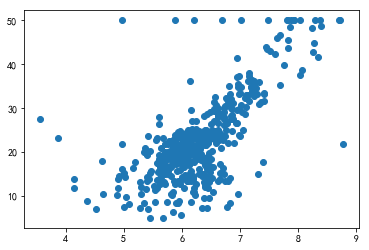

In [54]:
plt.scatter(X_rm,y)

### Gradient descent
### Assume that the target funciton is a linear function
$$ y = k*rm + b$$

In [55]:
def price(rm, k, b):
    return k * rm + b

### define mean absolute loss

$$MSE = \sum_{i = 1}^n (y_i - \hat{y_i})^2 \tag1$$

$$MAE = \sum_{i = 1}^n |y_i - \hat{y_i}| \tag2$$

In [56]:
# define loss function 
def loss(y,y_hat):
    return sum(np.abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

### define partial derivatives

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum_{i = 1}^n x_i \tag1$$

$$ \frac{\partial{loss}}{\partial{b}} = -1 \tag2$$

In [57]:
def partial_derivative_k(x): 
    gradient = -np.mean(np.abs(list(x)))
    return gradient

def partial_derivative_b():
    return -1

In [58]:
partial_derivative_k(X_rm)

-6.284634387351779

## 用MAE并不总能收敛

In [59]:
#random.seed(2020)
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 1000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm)
    b_gradient = partial_derivative_b()
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b


Iteration 0, the loss is 309.92587303827577, parameters k is -32.40195224525473 and b is -83.75864341630694
Iteration 1, the loss is 309.88537640889336, parameters k is -32.395667610867385 and b is -83.75764341630693
Iteration 2, the loss is 309.84487977951034, parameters k is -32.389382976480036 and b is -83.75664341630693
Iteration 3, the loss is 309.8043831501276, parameters k is -32.38309834209269 and b is -83.75564341630692
Iteration 4, the loss is 309.7638865207453, parameters k is -32.37681370770534 and b is -83.75464341630692
Iteration 5, the loss is 309.7233898913625, parameters k is -32.37052907331799 and b is -83.75364341630691
Iteration 6, the loss is 309.68289326197953, parameters k is -32.36424443893064 and b is -83.75264341630691
Iteration 7, the loss is 309.642396632597, parameters k is -32.35795980454329 and b is -83.7516434163069
Iteration 8, the loss is 309.6019000032143, parameters k is -32.35167517015594 and b is -83.7506434163069
Iteration 9, the loss is 309.56140

Iteration 186, the loss is 302.39349997309637, parameters k is -31.233010249207414 and b is -83.57264341630605
Iteration 187, the loss is 302.3530033437136, parameters k is -31.22672561482006 and b is -83.57164341630605
Iteration 188, the loss is 302.31250671433105, parameters k is -31.22044098043271 and b is -83.57064341630604
Iteration 189, the loss is 302.27201008494825, parameters k is -31.214156346045357 and b is -83.56964341630604
Iteration 190, the loss is 302.2315134555654, parameters k is -31.207871711658004 and b is -83.56864341630603
Iteration 191, the loss is 302.1910168261824, parameters k is -31.201587077270652 and b is -83.56764341630603
Iteration 192, the loss is 302.1505201968001, parameters k is -31.1953024428833 and b is -83.56664341630602
Iteration 193, the loss is 302.11002356741744, parameters k is -31.189017808495947 and b is -83.56564341630602
Iteration 194, the loss is 302.06952693803464, parameters k is -31.182733174108595 and b is -83.56464341630601
Iteration

Iteration 410, the loss is 293.3222549913725, parameters k is -29.82525214644048 and b is -83.34864341630498
Iteration 411, the loss is 293.2817583619904, parameters k is -29.818967512053128 and b is -83.34764341630498
Iteration 412, the loss is 293.2412617326077, parameters k is -29.812682877665775 and b is -83.34664341630497
Iteration 413, the loss is 293.2007651032246, parameters k is -29.806398243278423 and b is -83.34564341630497
Iteration 414, the loss is 293.1602684738421, parameters k is -29.80011360889107 and b is -83.34464341630496
Iteration 415, the loss is 293.11977184445976, parameters k is -29.793828974503718 and b is -83.34364341630496
Iteration 416, the loss is 293.0792752150769, parameters k is -29.787544340116366 and b is -83.34264341630495
Iteration 417, the loss is 293.03877858569365, parameters k is -29.781259705729013 and b is -83.34164341630495
Iteration 418, the loss is 292.9982819563114, parameters k is -29.77497507134166 and b is -83.34064341630494
Iteration 4

Iteration 602, the loss is 285.54690214989574, parameters k is -28.618602344068822 and b is -83.15664341630406
Iteration 603, the loss is 285.5064055205133, parameters k is -28.61231770968147 and b is -83.15564341630406
Iteration 604, the loss is 285.46590889113037, parameters k is -28.606033075294118 and b is -83.15464341630405
Iteration 605, the loss is 285.4254122617475, parameters k is -28.599748440906765 and b is -83.15364341630405
Iteration 606, the loss is 285.3849156323651, parameters k is -28.593463806519413 and b is -83.15264341630404
Iteration 607, the loss is 285.34441900298236, parameters k is -28.58717917213206 and b is -83.15164341630404
Iteration 608, the loss is 285.30392237359973, parameters k is -28.580894537744708 and b is -83.15064341630404
Iteration 609, the loss is 285.26342574421693, parameters k is -28.574609903357356 and b is -83.14964341630403
Iteration 610, the loss is 285.22292911483424, parameters k is -28.568325268970003 and b is -83.14864341630403
Iterat

Iteration 891, the loss is 273.84337625829744, parameters k is -26.802343006123984 and b is -82.86764341630268
Iteration 892, the loss is 273.80287962891487, parameters k is -26.79605837173663 and b is -82.86664341630268
Iteration 893, the loss is 273.76238299953195, parameters k is -26.78977373734928 and b is -82.86564341630267
Iteration 894, the loss is 273.7218863701497, parameters k is -26.783489102961926 and b is -82.86464341630267
Iteration 895, the loss is 273.6813897407666, parameters k is -26.777204468574574 and b is -82.86364341630266
Iteration 896, the loss is 273.6408931113842, parameters k is -26.77091983418722 and b is -82.86264341630266
Iteration 897, the loss is 273.60039648200154, parameters k is -26.76463519979987 and b is -82.86164341630266
Iteration 898, the loss is 273.5598998526189, parameters k is -26.758350565412517 and b is -82.86064341630265
Iteration 899, the loss is 273.5194032232363, parameters k is -26.752065931025165 and b is -82.85964341630265
Iteration 

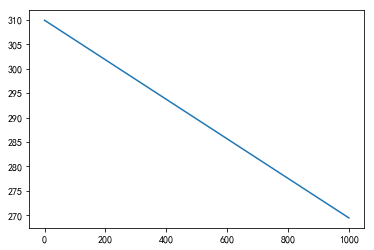

In [60]:
plt.plot(list(range(iteration_num)),losses)

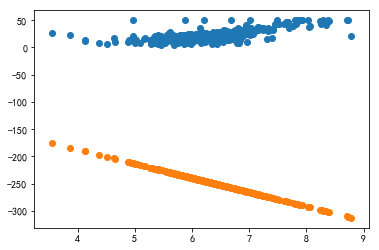

In [61]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)